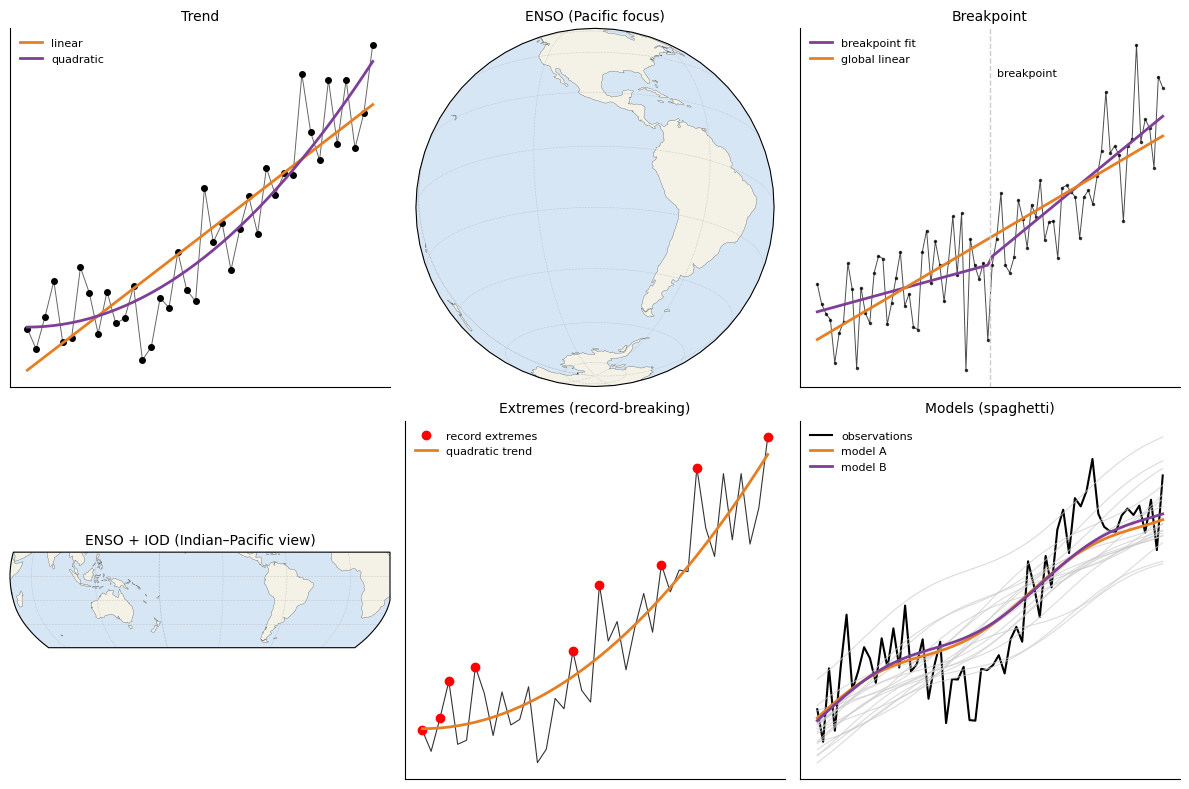

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import FancyArrowPatch

np.random.seed(42)

# Colors
ORANGE = "#e67e22"
PURPLE = "#7e3f98"
LIGHT_GREY = "#cccccc"

fig = plt.figure(figsize=(12, 8))

# ============================================================
# 1) TREND PANEL (top-left)
# ============================================================
ax1 = fig.add_subplot(2, 3, 1)

# Accelerating time series, save for reuse in extremes
x_trend = np.linspace(0, 10, 40)
y_true_trend = 0.3 * x_trend + 0.05 * x_trend**2 + 1
y_trend = y_true_trend + np.random.normal(scale=1.0, size=len(x_trend))

# Data: black line + black points
ax1.plot(x_trend, y_trend, "-", linewidth=0.7, color="black", alpha=0.6)
ax1.plot(x_trend, y_trend, "o", ms=4, color="black")

# Linear fit (orange)
coef_lin = np.polyfit(x_trend, y_trend, 1)
y_lin = np.polyval(coef_lin, x_trend)
ax1.plot(x_trend, y_lin, linewidth=2, color=ORANGE, label="linear")

# Quadratic fit (purple)
coef_quad = np.polyfit(x_trend, y_trend, 2)
y_quad = np.polyval(coef_quad, x_trend)
ax1.plot(x_trend, y_quad, linewidth=2, color=PURPLE, label="quadratic")

ax1.set_title("Trend", fontsize=10)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(x_trend.min() - 0.5, x_trend.max() + 0.5)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(fontsize=8, frameon=False, loc="upper left")

# ============================================================
# 2) ENSO PANEL (Orthographic, your settings)
# ============================================================
ax2 = fig.add_subplot(
    2, 3, 2,
    projection=ccrs.Orthographic(central_longitude=260, central_latitude=-20)
)

# Ocean light blue
ax2.set_facecolor('#d7e6f5')

# Light-colored continents
ax2.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',   # pale land color
    edgecolor='none',
    zorder=1
)

# Coastlines on top
ax2.coastlines(resolution='110m', linewidth=0.15, zorder=2)

# Optional grid
ax2.gridlines(linestyle=':', linewidth=0.4)

ax2.set_title("ENSO (Pacific focus)", fontsize=10)

# ============================================================
# 3) BREAKPOINT PANEL (top-right)
# ============================================================
ax3 = fig.add_subplot(2, 3, 3)

x_bp = np.linspace(0, 10, 80)
break_x = 5
y_piecewise = np.piecewise(
    x_bp,
    [x_bp <= break_x, x_bp > break_x],
    [lambda z: 0.3 * z + 1,
     lambda z: 1.2 + 0.9 * (z - break_x) + 0.3 * break_x]
)
y_bp_noisy = y_piecewise + np.random.normal(scale=1.2, size=len(x_bp))

# Data: black noisy line + markers
ax3.plot(x_bp, y_bp_noisy, "-", linewidth=0.7, color="black", alpha=0.7)
ax3.plot(x_bp, y_bp_noisy, ".", ms=3, color="black", alpha=0.7)

# Breakpoint fit (light grey)
ax3.plot(x_bp, y_piecewise, linewidth=2, color=PURPLE, label="breakpoint fit")

# Linear trend over whole series (orange)
coef_lin_bp = np.polyfit(x_bp, y_bp_noisy, 1)
y_lin_bp = np.polyval(coef_lin_bp, x_bp)
ax3.plot(x_bp, y_lin_bp, linewidth=2, color=ORANGE, label="global linear")

ax3.axvline(break_x, linestyle="--", color=LIGHT_GREY, linewidth=1)
ax3.text(break_x + 0.2, ax3.get_ylim()[1] * 0.85, "breakpoint", fontsize=8)

ax3.set_title("Breakpoint", fontsize=10)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.legend(fontsize=8, frameon=False, loc="upper left")

# ============================================================
# 4) ENSO + IOD PANEL (Robinson, your settings)
# ============================================================
ax4 = fig.add_subplot(
    2, 3, 4,
    projection=ccrs.Robinson(central_longitude=220)
)

# Ocean light blue
ax4.set_facecolor('#d7e6f5')

# Light-colored continents
ax4.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',   # pale land color
    edgecolor='none',
    zorder=1
)

# Coastlines on top
ax4.coastlines(resolution='110m', linewidth=0.15, zorder=2)

# Optional grid
ax4.gridlines(linestyle=':', linewidth=0.4)

# Limit extent: Indian Ocean to South America, SH focus
# (tweak these if you want a slightly different window)
ax4.set_extent([40, -40, -60, 20], crs=ccrs.PlateCarree())

ax4.set_title("ENSO + IOD (Indian–Pacific view)", fontsize=10)

# ============================================================
# 5) EXTREMES PANEL (reuse trend series, record-breakers)
# ============================================================
ax5 = fig.add_subplot(2, 3, 5)

# Use x_trend, y_trend from panel 1
ax5.plot(x_trend, y_trend, "-", linewidth=0.8, color="black", alpha=0.8)

# Identify record-breaking points (shattering previous max)
records = []
current_max = -np.inf
for xi, yi in zip(x_trend, y_trend):
    if yi > current_max:
        records.append(True)
        current_max = yi
    else:
        records.append(False)
records = np.array(records)

ax5.plot(
    x_trend[records], y_trend[records],
    "o", ms=6, color="red", label="record extremes"
)

# Optional: a quadratic fit over the same series (orange)
y_ext_fit = y_quad  # from panel 1 quadratic fit
ax5.plot(x_trend, y_ext_fit, linewidth=2, color=ORANGE, label="quadratic trend")

ax5.set_title("Extremes (record-breaking)", fontsize=10)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(fontsize=8, frameon=False, loc="upper left")

# ============================================================
# 6) MODEL SELECTION PANEL (spaghetti + 2 highlighted)
# ============================================================
ax6 = fig.add_subplot(2, 3, 6)

x_m = np.linspace(0, 10, 60)
y_obs = 0.4 * x_m + np.sin(x_m) + np.random.normal(scale=0.5, size=len(x_m))

# Observations (black)
ax6.plot(x_m, y_obs, linewidth=1.5, color="black", label="observations")

# Spaghetti: 20 candidate models
model_curves = []
for i in range(20):
    slope = 0.4 + np.random.normal(scale=0.05)
    intercept = np.random.normal(scale=0.3)
    wiggle = 0.2 * np.sin(x_m + np.random.uniform(0, 2*np.pi))
    y_model = slope * x_m + intercept + wiggle
    model_curves.append(y_model)
    ax6.plot(x_m, y_model, linewidth=0.8, color=LIGHT_GREY, alpha=0.7)

model_curves = np.array(model_curves)

# Pick two closest models to observations (RMSE)
rmse = np.sqrt(((model_curves - y_obs) ** 2).mean(axis=1))
best_indices = np.argsort(rmse)[:2]

# Highlight them: orange & purple
ax6.plot(
    x_m, model_curves[best_indices[0]],
    linewidth=2.0, color=ORANGE, label="model A"
)
ax6.plot(
    x_m, model_curves[best_indices[1]],
    linewidth=2.0, color=PURPLE, label="model B"
)

ax6.set_title("Models (spaghetti)", fontsize=10)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.legend(fontsize=8, frameon=False, loc="upper left")

plt.tight_layout()
plt.show()


Text(0.0, 1.0, 'a)')

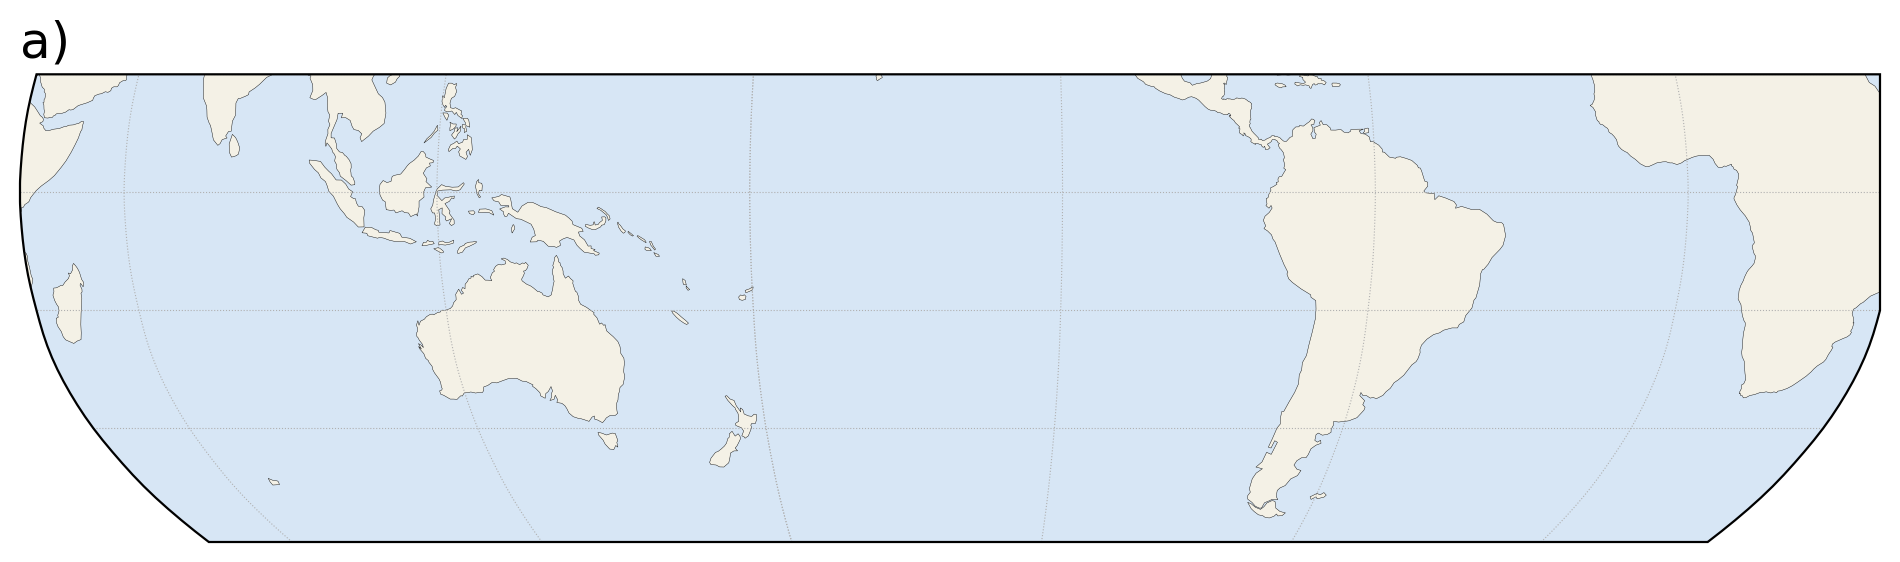

In [7]:

fig = plt.figure(figsize=(12, 8),dpi=200)

ax4 = fig.add_subplot(
    1,1,1,
    projection=ccrs.Robinson(central_longitude=220)
)

# Ocean light blue
ax4.set_facecolor('#d7e6f5')

# Light-colored continents
ax4.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',   # pale land color
    edgecolor='none',
    zorder=1
)

# Coastlines on top
ax4.coastlines(resolution='110m', linewidth=0.15, zorder=2)

# Optional grid
ax4.gridlines(linestyle=':', linewidth=0.4)

# Limit extent: Indian Ocean to South America, SH focus
# (tweak these if you want a slightly different window)
ax4.set_extent([40, -40, -60, 20], crs=ccrs.PlateCarree())

ax4.set_title("a)", loc='left' ,fontsize=18)


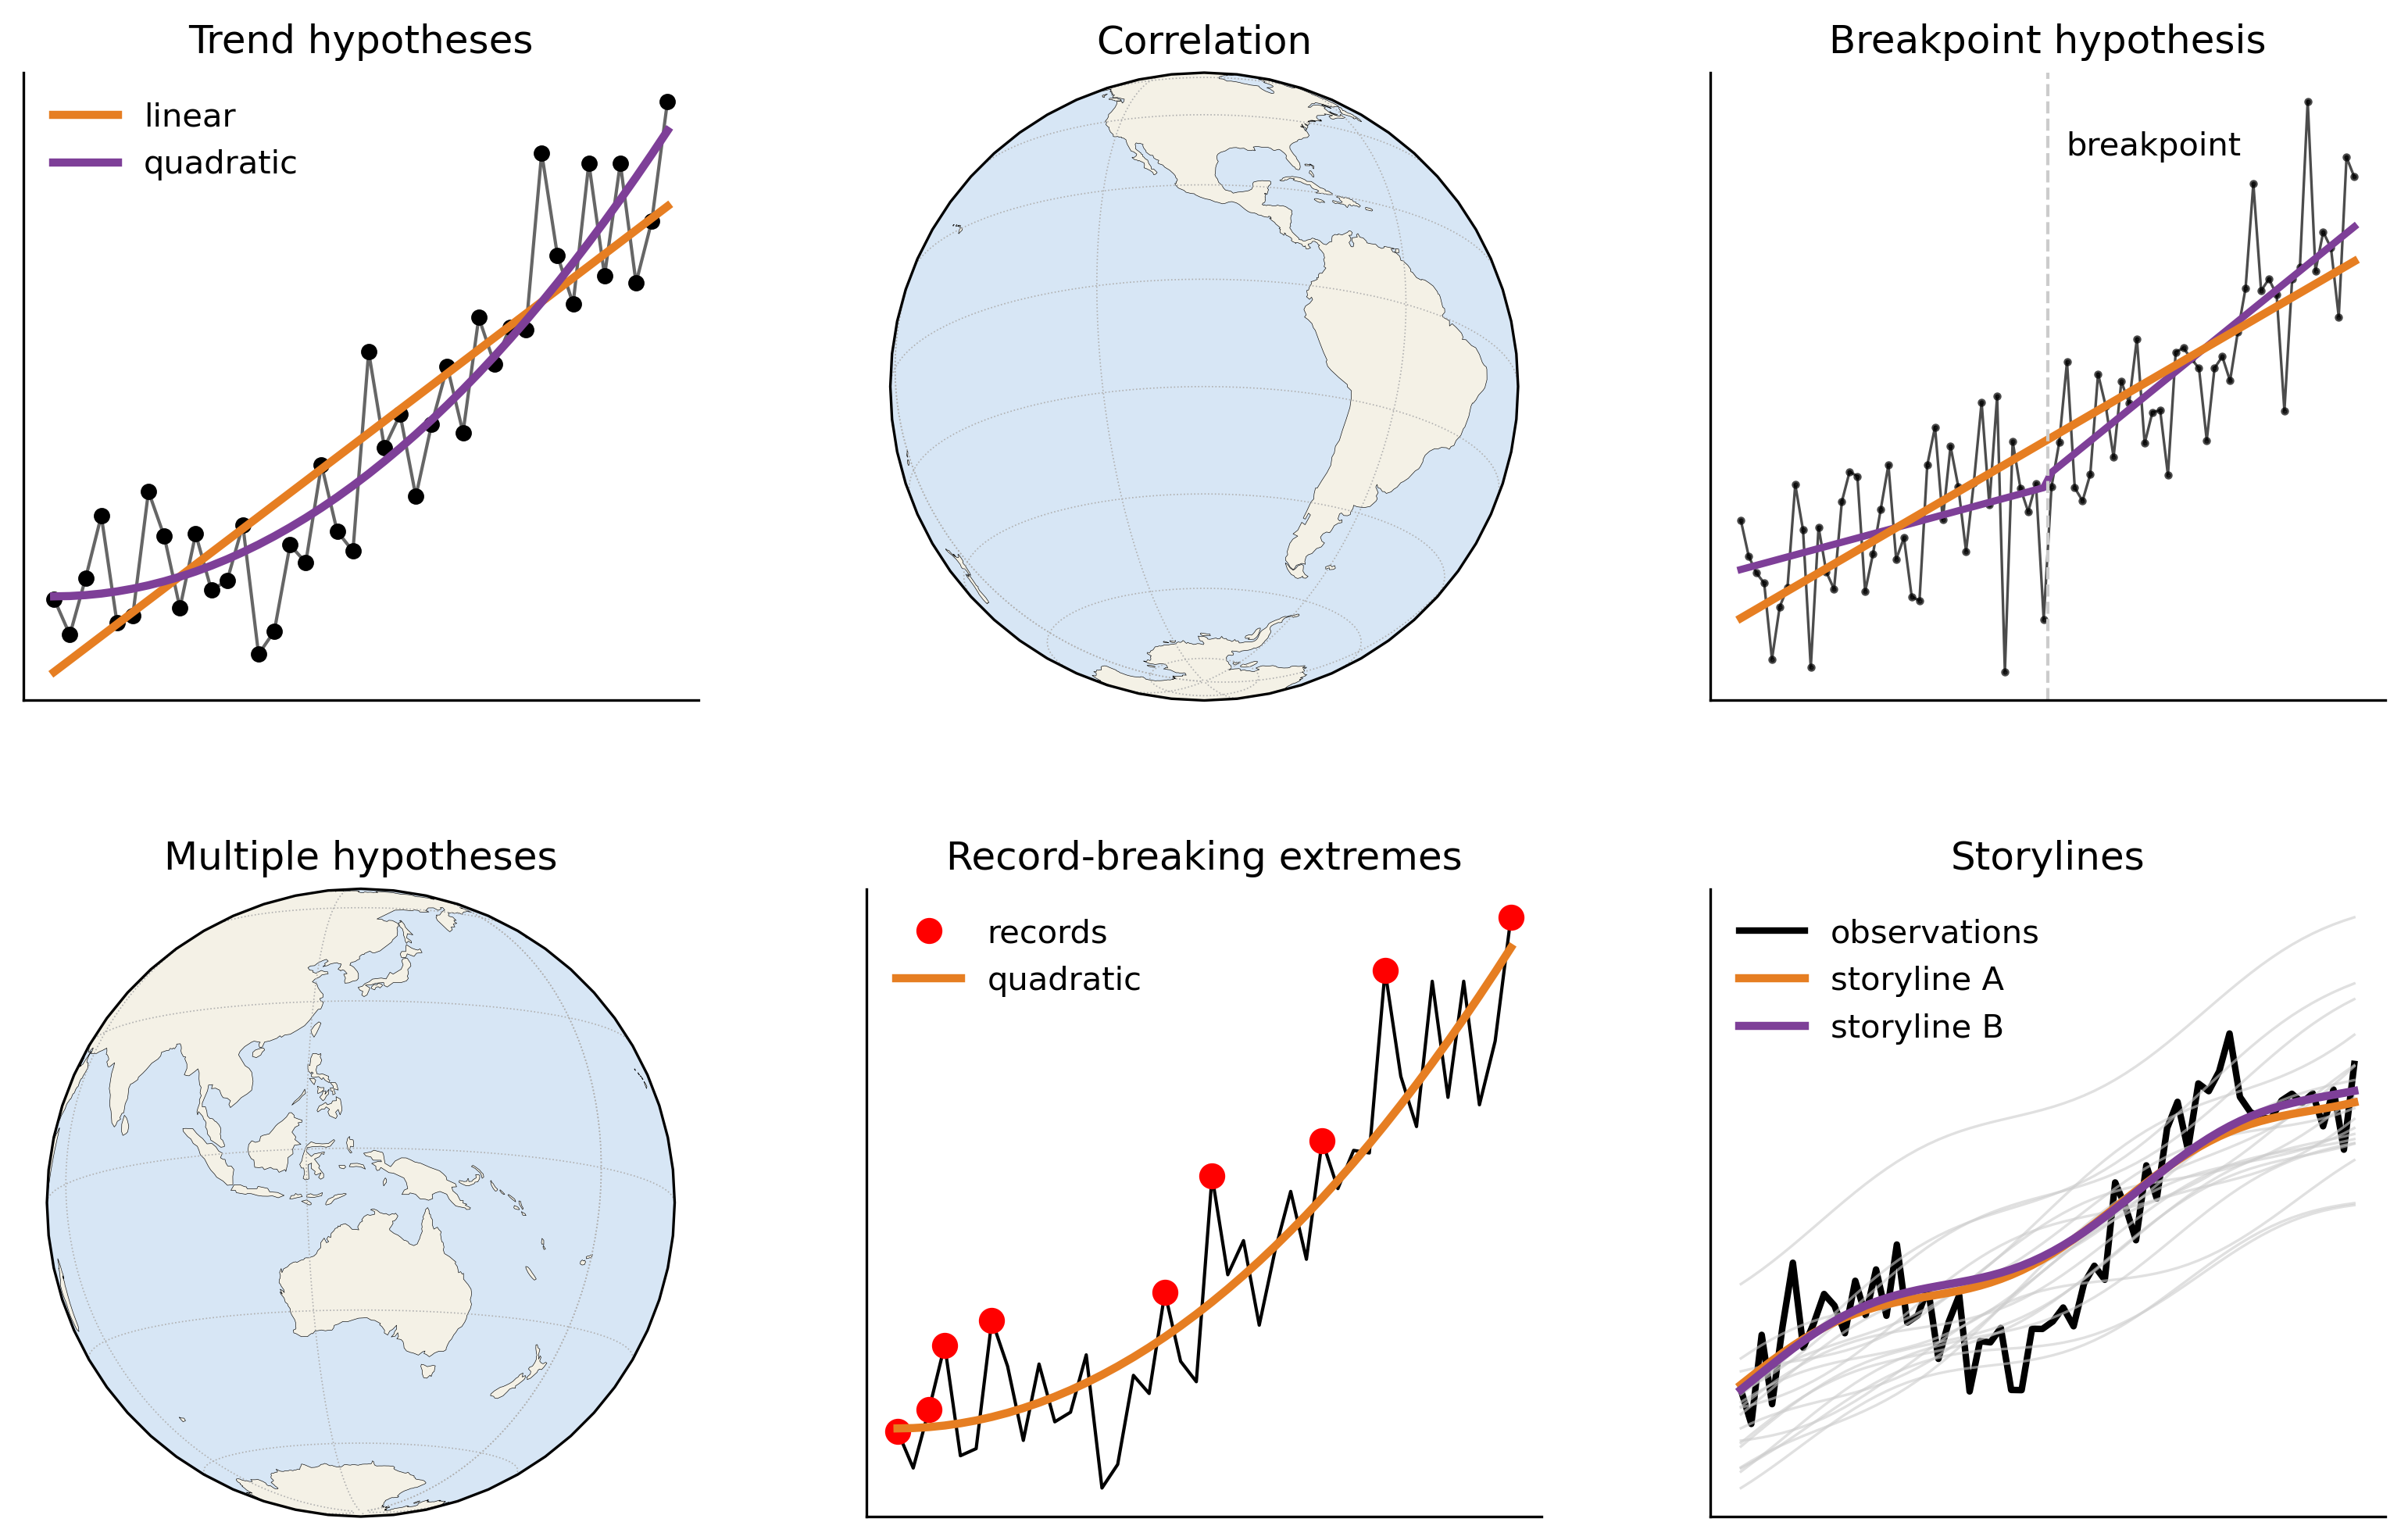

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

np.random.seed(42)

# Colors
ORANGE = "#e67e22"
PURPLE = "#7e3f98"
LIGHT_GREY = "#cccccc"

fig = plt.figure(figsize=(13, 8),dpi=300)

# Tighter space between panels
plt.subplots_adjust(wspace=0.25, hspace=0.30)

# ============================================================
# 1) TREND PANEL
# ============================================================
ax1 = fig.add_subplot(2, 3, 1)

x_trend = np.linspace(0, 10, 40)
y_true_trend = 0.3 * x_trend + 0.05 * x_trend**2 + 1
y_trend = y_true_trend + np.random.normal(scale=1.0, size=len(x_trend))

ax1.plot(x_trend, y_trend, "-", linewidth=1.0, color="black", alpha=0.6)
ax1.plot(x_trend, y_trend, "o", ms=4, color="black")

coef_lin = np.polyfit(x_trend, y_trend, 1)
y_lin = np.polyval(coef_lin, x_trend)
ax1.plot(x_trend, y_lin, linewidth=2.5, color=ORANGE, label="linear")

coef_quad = np.polyfit(x_trend, y_trend, 2)
y_quad = np.polyval(coef_quad, x_trend)
ax1.plot(x_trend, y_quad, linewidth=2.5, color=PURPLE, label="quadratic")

ax1.set_title("Trend hypotheses", fontsize=12, pad=6)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(fontsize=10, frameon=False)

# ============================================================
# 2) ENSO PANEL (Orthographic)
# ============================================================
ax2 = fig.add_subplot(
    2, 3, 2,
    projection=ccrs.Orthographic(central_longitude=260, central_latitude=-20)
)

ax2.set_facecolor('#d7e6f5')
ax2.add_feature(cfeature.LAND.with_scale('110m'),
                facecolor='#f4f1e6', edgecolor='none')
ax2.coastlines(resolution='110m', linewidth=0.15)
ax2.gridlines(linestyle=':', linewidth=0.4)

ax2.set_title("Correlation", fontsize=12, pad=6)

# ============================================================
# 3) BREAKPOINT PANEL
# ============================================================
ax3 = fig.add_subplot(2, 3, 3)

x_bp = np.linspace(0, 10, 80)
break_x = 5
y_piecewise = np.piecewise(
    x_bp,
    [x_bp <= break_x, x_bp > break_x],
    [lambda z: 0.3*z + 1,
     lambda z: 1.2 + 0.9*(z - break_x) + 0.3*break_x]
)
y_bp_noisy = y_piecewise + np.random.normal(scale=1.2, size=len(x_bp))

ax3.plot(x_bp, y_bp_noisy, "-", linewidth=0.8, color="black", alpha=0.7)
ax3.plot(x_bp, y_bp_noisy, ".", ms=3, color="black", alpha=0.7)

ax3.plot(x_bp, y_piecewise, linewidth=2.2, color=PURPLE)
coef_lin_bp = np.polyfit(x_bp, y_bp_noisy, 1)
y_lin_bp = np.polyval(coef_lin_bp, x_bp)
ax3.plot(x_bp, y_lin_bp, linewidth=2.5, color=ORANGE)

ax3.axvline(break_x, linestyle="--", color=LIGHT_GREY, linewidth=1)
ax3.text(break_x + 0.3, ax3.get_ylim()[1]*0.85, "breakpoint", fontsize=10)

ax3.set_title("Breakpoint hypothesis", fontsize=12, pad=6)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# ============================================================
# 4) ENSO + IOD PANEL (Robinson)
# ============================================================
ax4 = fig.add_subplot(
    2, 3, 4,
    projection=ccrs.Orthographic(central_longitude=130, central_latitude=-10)
)
# Ocean light blue
ax4.set_facecolor('#d7e6f5')

# Pale continents
ax4.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',
    edgecolor='none',
    zorder=1
)
# Coastlines
ax4.coastlines(resolution='110m', linewidth=0.15, zorder=2)
# Optional gridlines
ax4.gridlines(linestyle=':', linewidth=0.4)

ax4.set_title("Multiple hypotheses", fontsize=12, pad=6)
# ============================================================
# 5) EXTREMES PANEL (record-breaking on trend data)
# ============================================================
ax5 = fig.add_subplot(2, 3, 5)

ax5.plot(x_trend, y_trend, "-", linewidth=1.0, color="black")

records = []
current_max = -np.inf
for xi, yi in zip(x_trend, y_trend):
    if yi > current_max:
        records.append(True)
        current_max = yi
    else:
        records.append(False)
records = np.array(records)

ax5.plot(x_trend[records], y_trend[records], "o", ms=7, color="red", label="records")

ax5.plot(x_trend, y_quad, linewidth=2.5, color=ORANGE, label="quadratic")

ax5.set_title("Record-breaking extremes", fontsize=12, pad=6)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(fontsize=10, frameon=False)

# ============================================================
# 6) MODEL SELECTION (spaghetti with 2 highlighted models)
# ============================================================
ax6 = fig.add_subplot(2, 3, 6)

x_m = np.linspace(0, 10, 60)
y_obs = 0.4*x_m + np.sin(x_m) + np.random.normal(scale=0.4, size=len(x_m))

# Observations: black, slightly thicker
ax6.plot(x_m, y_obs, linewidth=2, color="black", label="observations")

# Spaghetti: 20 candidate smooth models
model_curves = []
for i in range(20):
    slope = 0.4 + np.random.normal(scale=0.07)
    intercept = np.random.normal(scale=0.5)
    phase = np.random.uniform(0, 2*np.pi)
    wiggle = 0.25 * np.sin(x_m + phase)
    y_model = slope * x_m + intercept + wiggle
    model_curves.append(y_model)
    ax6.plot(x_m, y_model, linewidth=0.8, color=LIGHT_GREY, alpha=0.6)

model_curves = np.array(model_curves)

# Pick two closest models to observations (RMSE)
rmse = np.sqrt(((model_curves - y_obs)**2).mean(axis=1))
best_indices = np.argsort(rmse)[:2]

# Highlight those *unchanged* model curves in orange & purple
ax6.plot(
    x_m, model_curves[best_indices[0]],
    linewidth=2.5, color=ORANGE, label="storyline A"
)
ax6.plot(
    x_m, model_curves[best_indices[1]],
    linewidth=2.5, color=PURPLE, label="storyline B"
)
ax6.set_title("Storylines", fontsize=12, pad=6)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.legend(fontsize=10, frameon=False)

plt.show()


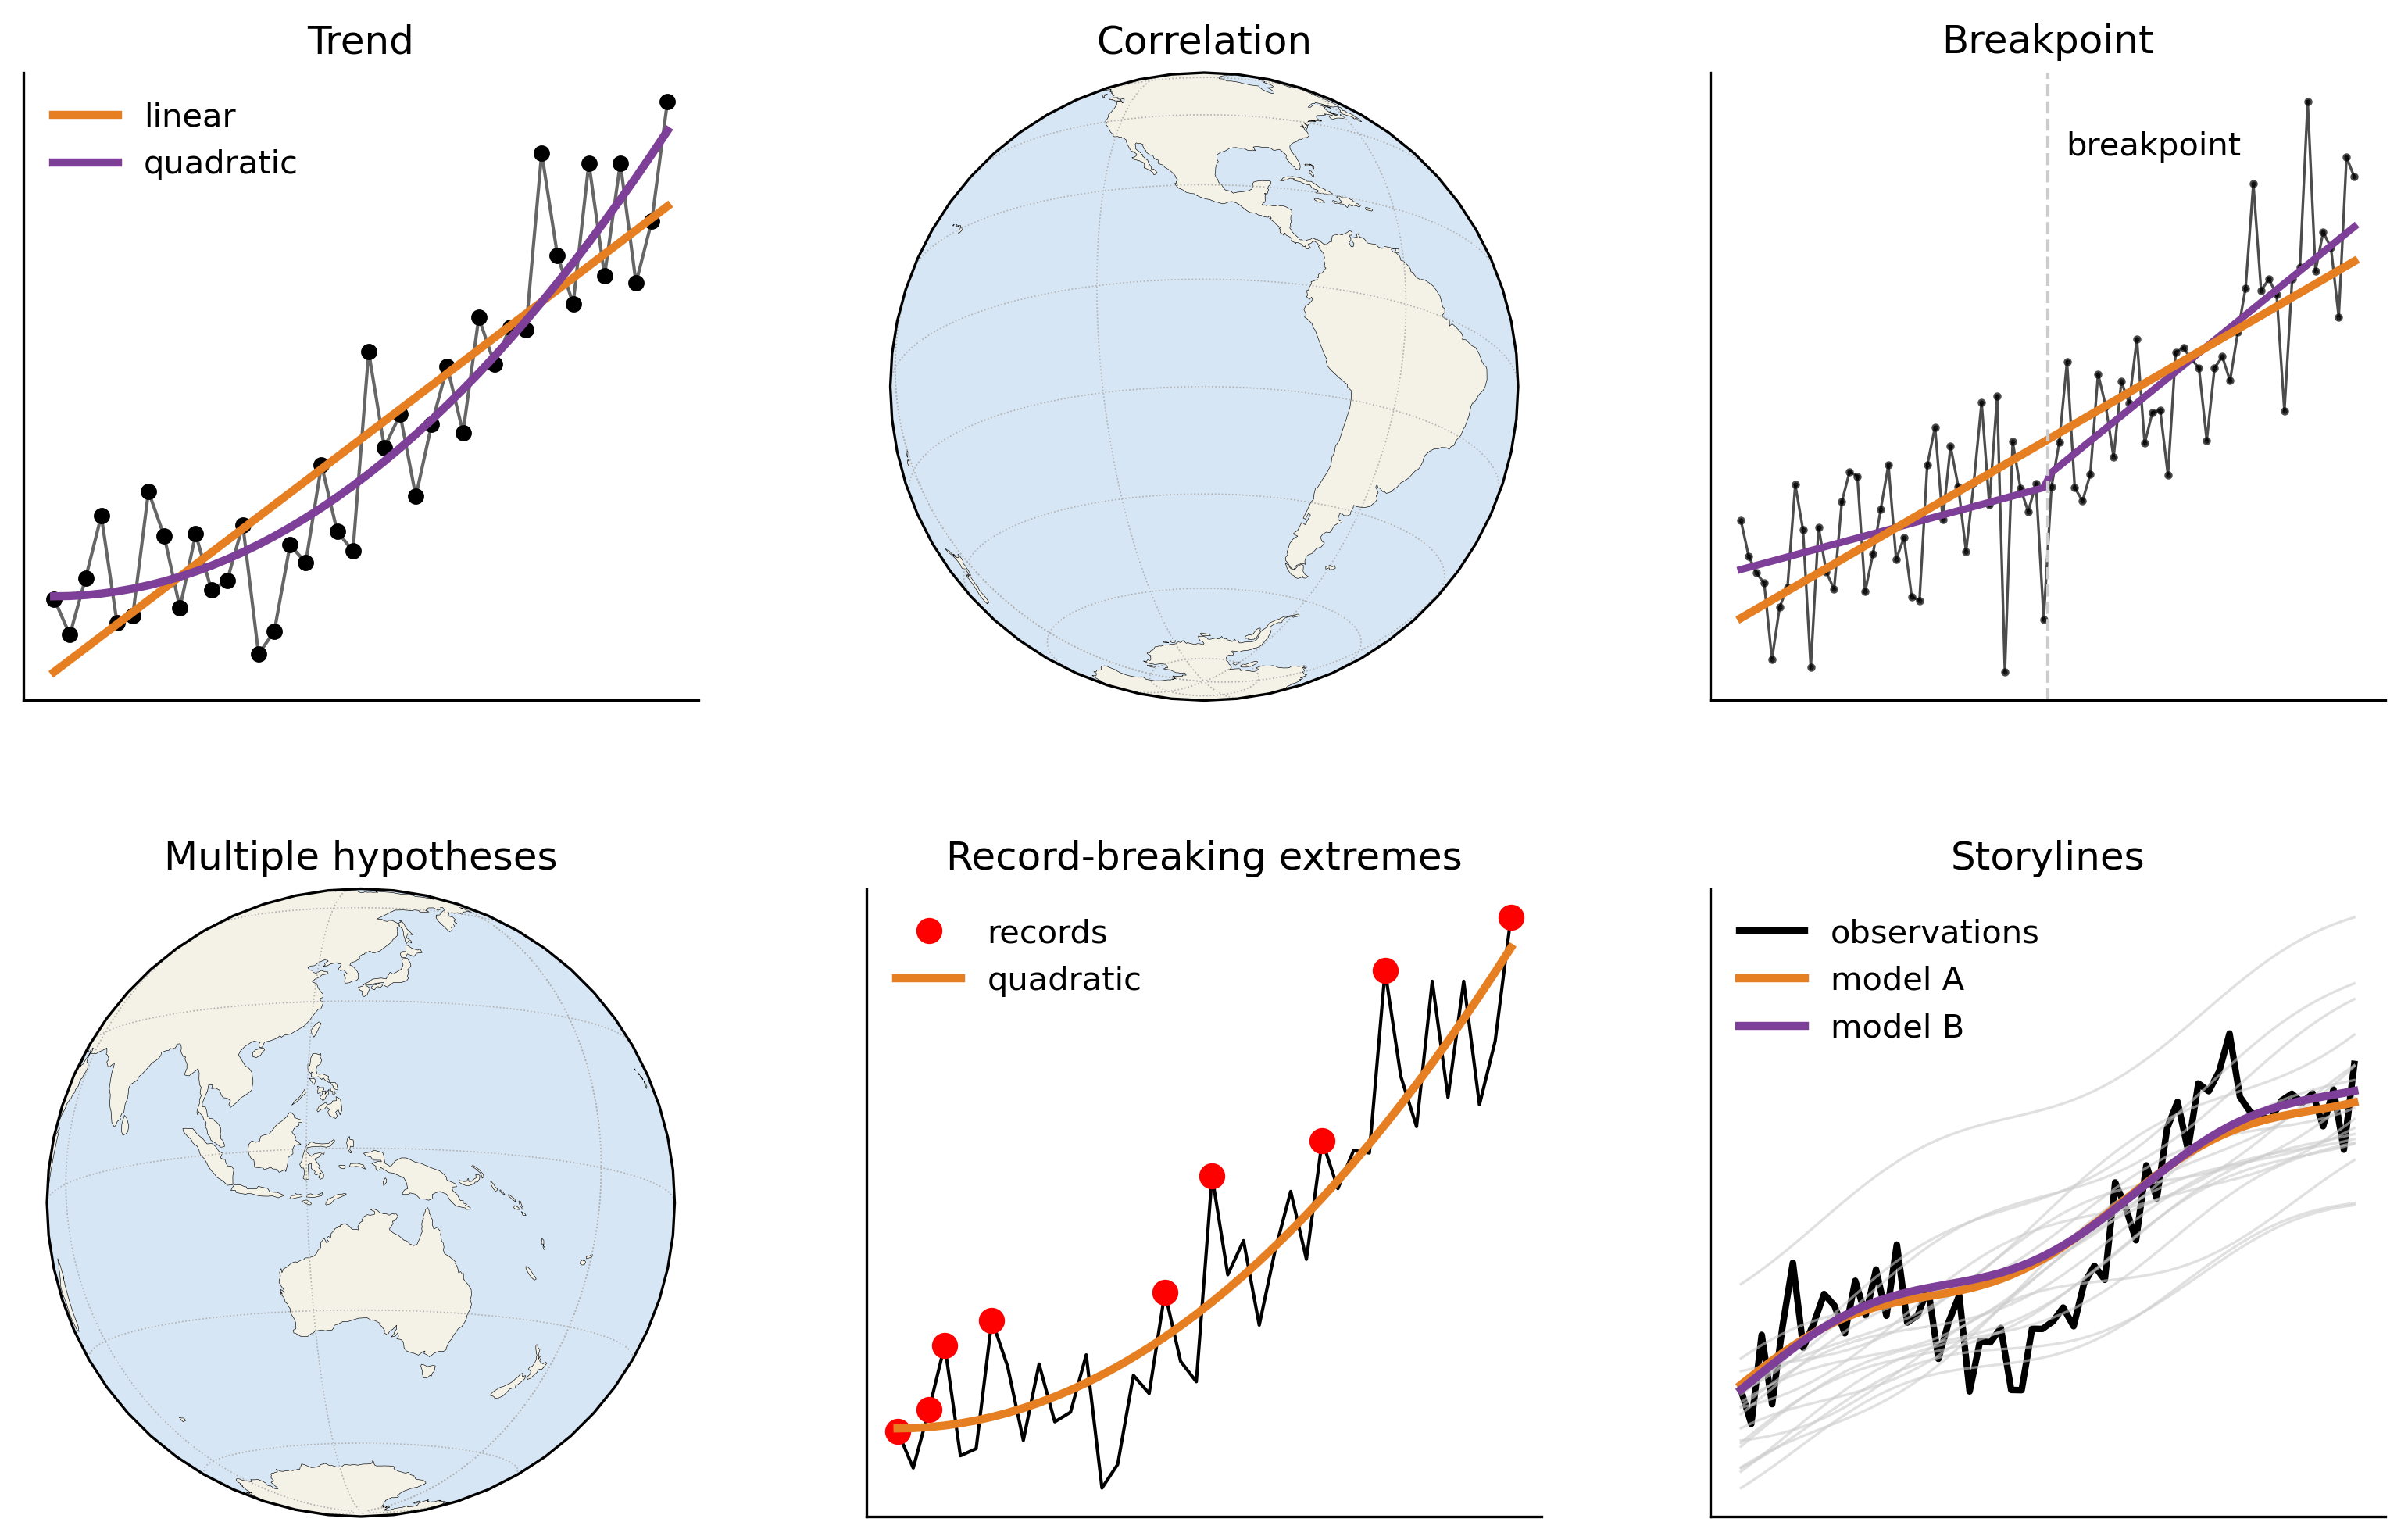

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

np.random.seed(42)

# Colors
ORANGE = "#e67e22"
PURPLE = "#7e3f98"
LIGHT_GREY = "#cccccc"

fig = plt.figure(figsize=(13, 8),dpi=300)

# Tighter space between panels
plt.subplots_adjust(wspace=0.25, hspace=0.30)

# ============================================================
# 1) TREND PANEL
# ============================================================
ax1 = fig.add_subplot(2, 3, 1)

x_trend = np.linspace(0, 10, 40)
y_true_trend = 0.3 * x_trend + 0.05 * x_trend**2 + 1
y_trend = y_true_trend + np.random.normal(scale=1.0, size=len(x_trend))

ax1.plot(x_trend, y_trend, "-", linewidth=1.0, color="black", alpha=0.6)
ax1.plot(x_trend, y_trend, "o", ms=4, color="black")

coef_lin = np.polyfit(x_trend, y_trend, 1)
y_lin = np.polyval(coef_lin, x_trend)
ax1.plot(x_trend, y_lin, linewidth=2.5, color=ORANGE, label="linear")

coef_quad = np.polyfit(x_trend, y_trend, 2)
y_quad = np.polyval(coef_quad, x_trend)
ax1.plot(x_trend, y_quad, linewidth=2.5, color=PURPLE, label="quadratic")

ax1.set_title("Trend", fontsize=12, pad=6)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(fontsize=10, frameon=False)

# ============================================================
# 2) ENSO PANEL (Orthographic)
# ============================================================
ax2 = fig.add_subplot(
    2, 3, 2,
    projection=ccrs.Orthographic(central_longitude=260, central_latitude=-20)
)

ax2.set_facecolor('#d7e6f5')
ax2.add_feature(cfeature.LAND.with_scale('110m'),
                facecolor='#f4f1e6', edgecolor='none')
ax2.coastlines(resolution='110m', linewidth=0.15)
ax2.gridlines(linestyle=':', linewidth=0.4)

ax2.set_title("Correlation", fontsize=12, pad=6)

# ============================================================
# 3) BREAKPOINT PANEL
# ============================================================
ax3 = fig.add_subplot(2, 3, 3)

x_bp = np.linspace(0, 10, 80)
break_x = 5
y_piecewise = np.piecewise(
    x_bp,
    [x_bp <= break_x, x_bp > break_x],
    [lambda z: 0.3*z + 1,
     lambda z: 1.2 + 0.9*(z - break_x) + 0.3*break_x]
)
y_bp_noisy = y_piecewise + np.random.normal(scale=1.2, size=len(x_bp))

ax3.plot(x_bp, y_bp_noisy, "-", linewidth=0.8, color="black", alpha=0.7)
ax3.plot(x_bp, y_bp_noisy, ".", ms=3, color="black", alpha=0.7)

ax3.plot(x_bp, y_piecewise, linewidth=2.2, color=PURPLE)
coef_lin_bp = np.polyfit(x_bp, y_bp_noisy, 1)
y_lin_bp = np.polyval(coef_lin_bp, x_bp)
ax3.plot(x_bp, y_lin_bp, linewidth=2.5, color=ORANGE)

ax3.axvline(break_x, linestyle="--", color=LIGHT_GREY, linewidth=1)
ax3.text(break_x + 0.3, ax3.get_ylim()[1]*0.85, "breakpoint", fontsize=10)

ax3.set_title("Breakpoint", fontsize=12, pad=6)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# ============================================================
# 4) ENSO + IOD PANEL (Robinson)
# ============================================================
ax4 = fig.add_subplot(
    2, 3, 4,
    projection=ccrs.Orthographic(central_longitude=130, central_latitude=-10)
)
# Ocean light blue
ax4.set_facecolor('#d7e6f5')

# Pale continents
ax4.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',
    edgecolor='none',
    zorder=1
)
# Coastlines
ax4.coastlines(resolution='110m', linewidth=0.15, zorder=2)
# Optional gridlines
ax4.gridlines(linestyle=':', linewidth=0.4)

ax4.set_title("Multiple hypotheses", fontsize=12, pad=6)
# ============================================================
# 5) EXTREMES PANEL (record-breaking on trend data)
# ============================================================
ax5 = fig.add_subplot(2, 3, 5)

ax5.plot(x_trend, y_trend, "-", linewidth=1.0, color="black")

records = []
current_max = -np.inf
for xi, yi in zip(x_trend, y_trend):
    if yi > current_max:
        records.append(True)
        current_max = yi
    else:
        records.append(False)
records = np.array(records)

ax5.plot(x_trend[records], y_trend[records], "o", ms=7, color="red", label="records")

ax5.plot(x_trend, y_quad, linewidth=2.5, color=ORANGE, label="quadratic")

ax5.set_title("Record-breaking extremes", fontsize=12, pad=6)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(fontsize=10, frameon=False)

# ============================================================
# 6) MODEL SELECTION (spaghetti with 2 highlighted models)
# ============================================================
ax6 = fig.add_subplot(2, 3, 6)

x_m = np.linspace(0, 10, 60)
y_obs = 0.4*x_m + np.sin(x_m) + np.random.normal(scale=0.4, size=len(x_m))

# Observations: black, slightly thicker
ax6.plot(x_m, y_obs, linewidth=2, color="black", label="observations")

# Spaghetti: 20 candidate smooth models
model_curves = []
for i in range(20):
    slope = 0.4 + np.random.normal(scale=0.07)
    intercept = np.random.normal(scale=0.5)
    phase = np.random.uniform(0, 2*np.pi)
    wiggle = 0.25 * np.sin(x_m + phase)
    y_model = slope * x_m + intercept + wiggle
    model_curves.append(y_model)
    ax6.plot(x_m, y_model, linewidth=0.8, color=LIGHT_GREY, alpha=0.6)

model_curves = np.array(model_curves)

# Pick two closest models to observations (RMSE)
rmse = np.sqrt(((model_curves - y_obs)**2).mean(axis=1))
best_indices = np.argsort(rmse)[:2]

# Highlight those *unchanged* model curves in orange & purple
ax6.plot(
    x_m, model_curves[best_indices[0]],
    linewidth=2.5, color=ORANGE, label="model A"
)
ax6.plot(
    x_m, model_curves[best_indices[1]],
    linewidth=2.5, color=PURPLE, label="model B"
)
ax6.set_title("Storylines", fontsize=12, pad=6)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.legend(fontsize=10, frameon=False)

plt.show()


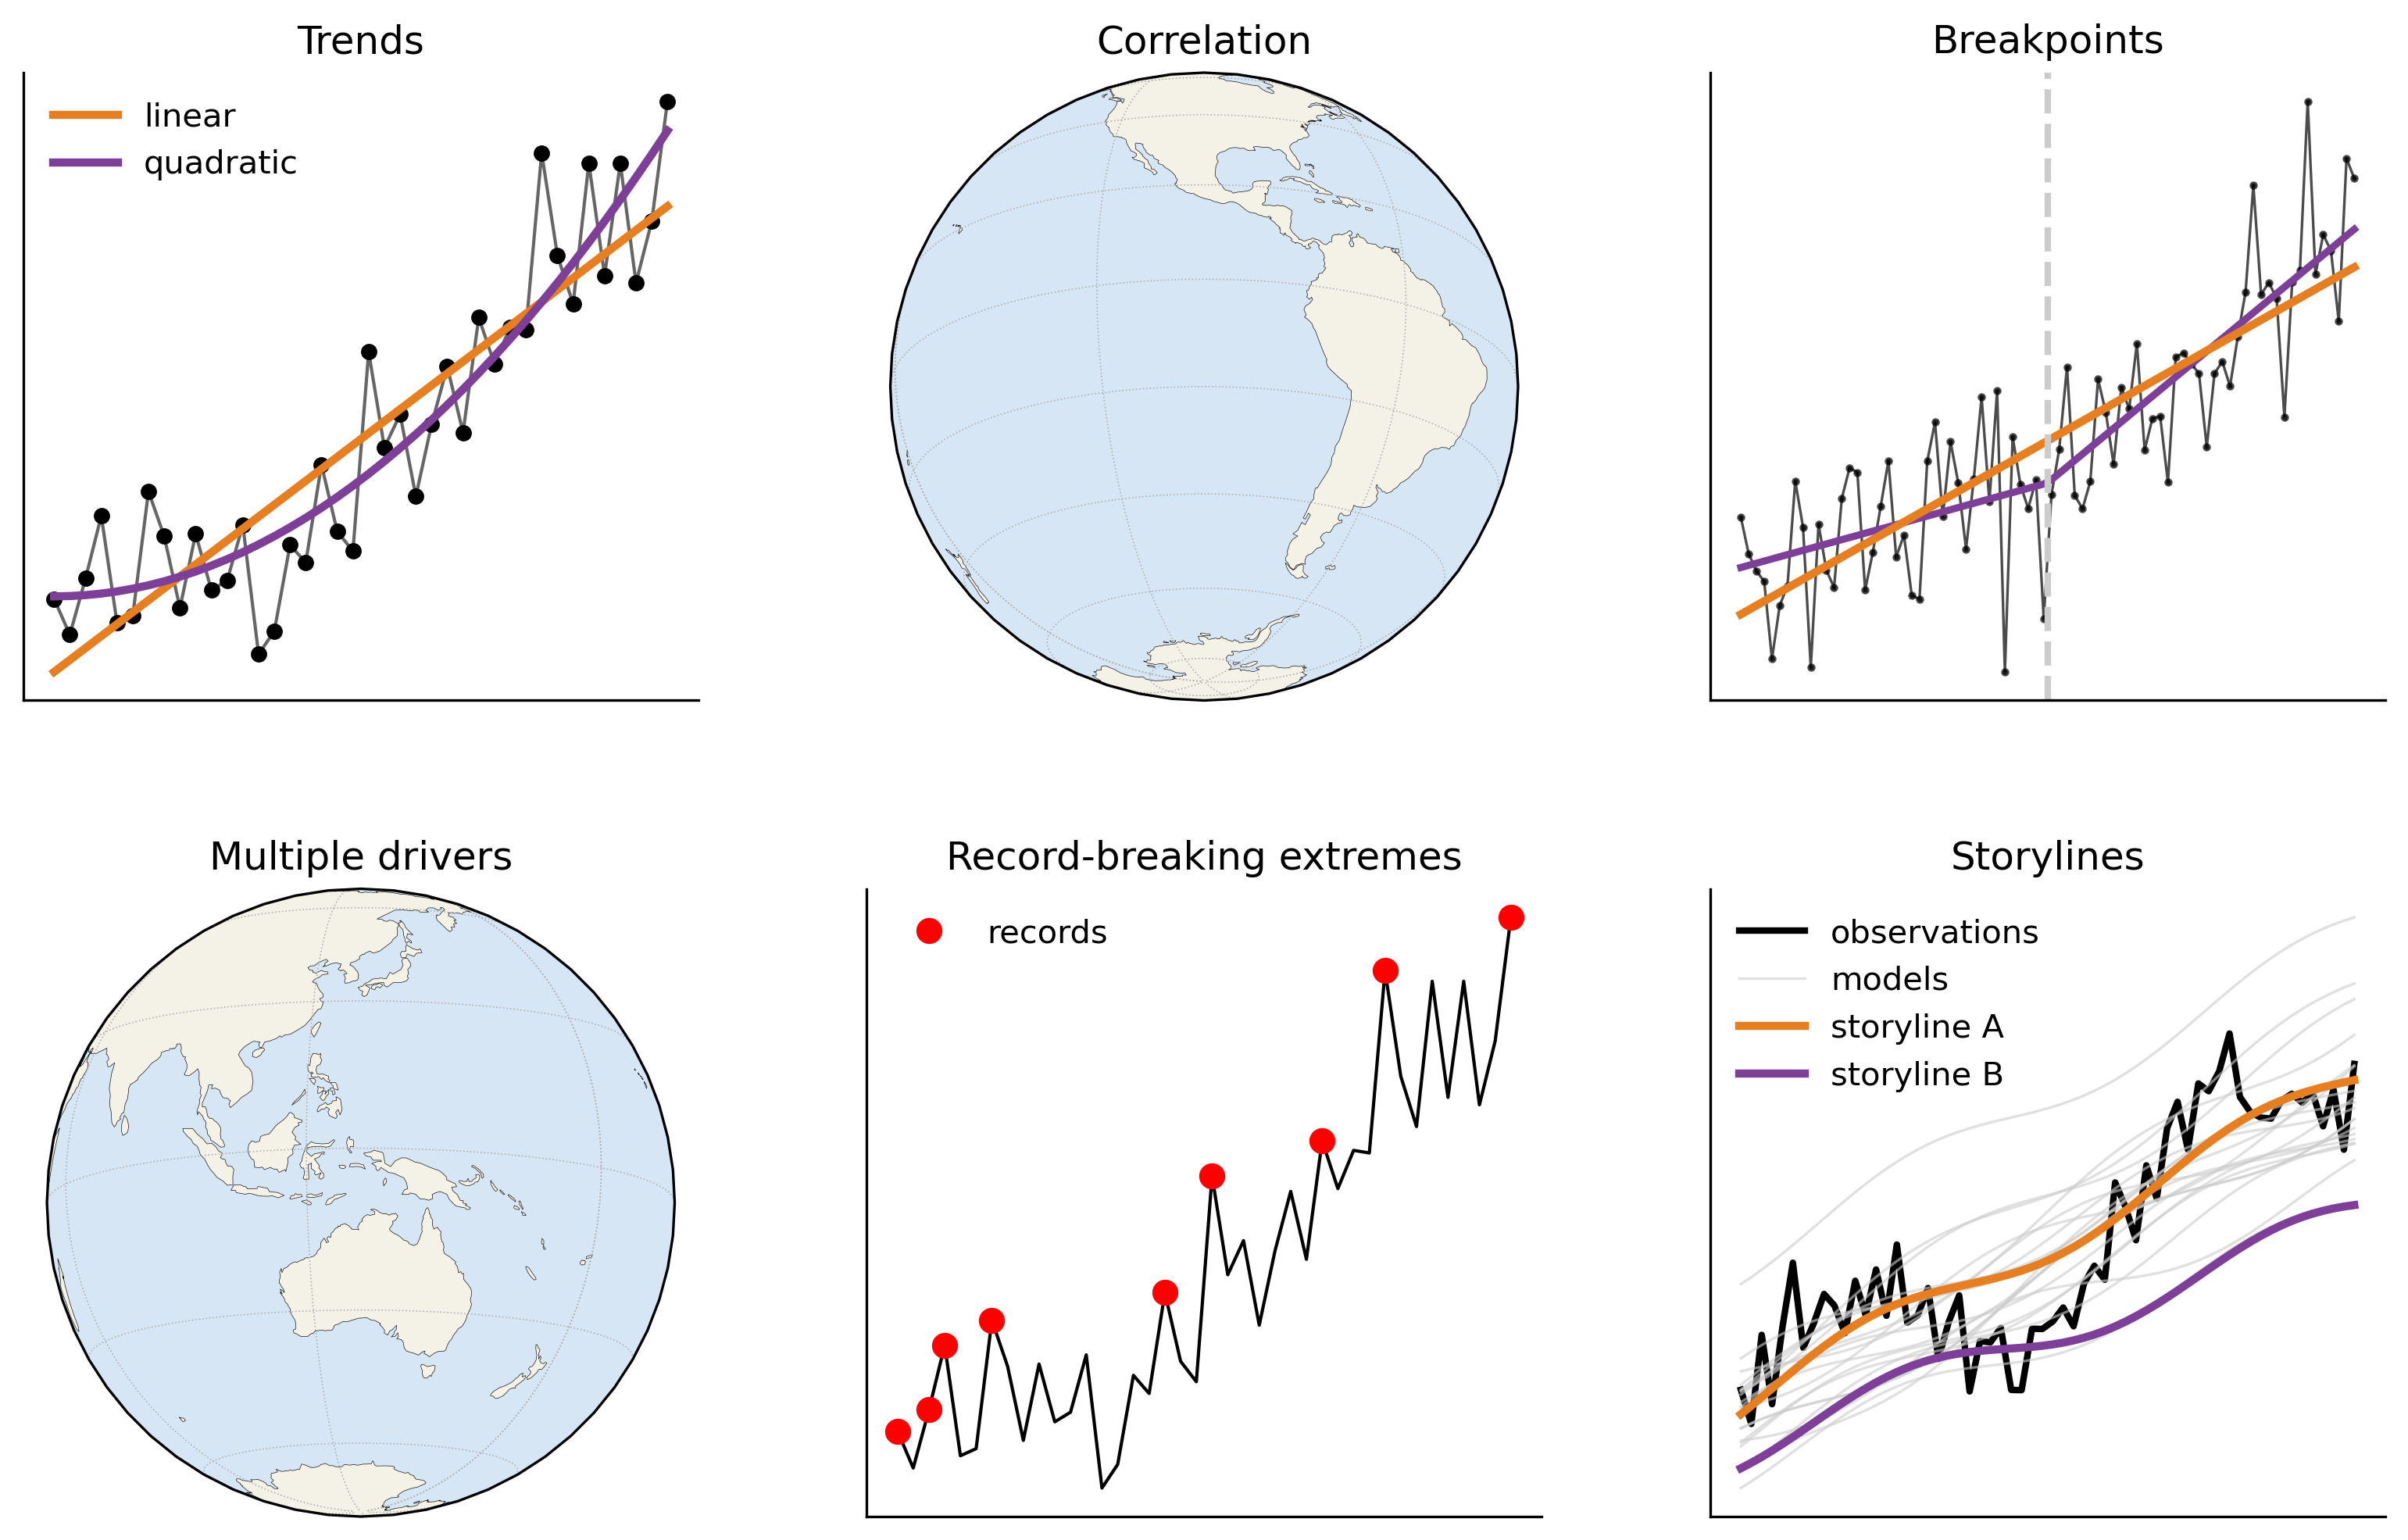

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

np.random.seed(42)

# Colors
ORANGE = "#e67e22"
PURPLE = "#7e3f98"
LIGHT_GREY = "#cccccc"

fig = plt.figure(figsize=(13, 8), dpi=300)

# Tighter space between panels
plt.subplots_adjust(wspace=0.25, hspace=0.30)

# ============================================================
# 1) TREND PANEL
# ============================================================
ax1 = fig.add_subplot(2, 3, 1)

x_trend = np.linspace(0, 10, 40)
y_true_trend = 0.3 * x_trend + 0.05 * x_trend**2 + 1
y_trend = y_true_trend + np.random.normal(scale=1.0, size=len(x_trend))

ax1.plot(x_trend, y_trend, "-", linewidth=1.0, color="black", alpha=0.6)
ax1.plot(x_trend, y_trend, "o", ms=4, color="black")

coef_lin = np.polyfit(x_trend, y_trend, 1)
y_lin = np.polyval(coef_lin, x_trend)
ax1.plot(x_trend, y_lin, linewidth=2.5, color=ORANGE, label="linear")

coef_quad = np.polyfit(x_trend, y_trend, 2)
y_quad = np.polyval(coef_quad, x_trend)
ax1.plot(x_trend, y_quad, linewidth=2.5, color=PURPLE, label="quadratic")

ax1.set_title("Trends", fontsize=12, pad=6)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(fontsize=10, frameon=False)

# ============================================================
# 2) ENSO PANEL (Orthographic)
# ============================================================
ax2 = fig.add_subplot(
    2, 3, 2,
    projection=ccrs.Orthographic(central_longitude=260, central_latitude=-20)
)

ax2.set_facecolor('#d7e6f5')
ax2.add_feature(cfeature.LAND.with_scale('110m'),
                facecolor='#f4f1e6', edgecolor='none')
ax2.coastlines(resolution='110m', linewidth=0.15)
ax2.gridlines(linestyle=':', linewidth=0.4)

ax2.set_title("Correlation", fontsize=12, pad=6)

# ============================================================
# 3) BREAKPOINT PANEL
#    Two purple lines that touch at the breakpoint + orange linear trend
# ============================================================
ax3 = fig.add_subplot(2, 3, 3)

x_bp = np.linspace(0, 10, 80)
break_x = 5

# Define two lines that meet at break_x
m1, b1 = 0.3, 1.0             # first segment: y = m1*x + b1
m2 = 0.9                       # second segment slope
y_break = m1 * break_x + b1    # value at breakpoint for continuity
b2 = y_break - m2 * break_x    # second intercept so that lines meet

y_piecewise = np.where(
    x_bp <= break_x,
    m1 * x_bp + b1,
    m2 * x_bp + b2
)

y_bp_noisy = y_piecewise + np.random.normal(scale=1.2, size=len(x_bp))

# Data: black noisy line + markers
ax3.plot(x_bp, y_bp_noisy, "-", linewidth=0.8, color="black", alpha=0.7)
ax3.plot(x_bp, y_bp_noisy, ".", ms=3, color="black", alpha=0.7)

# Breakpoint hypothesis: two purple segments touching at break_x
ax3.plot(x_bp, y_piecewise, linewidth=2.2, color=PURPLE)

# Global linear trend (orange)
coef_lin_bp = np.polyfit(x_bp, y_bp_noisy, 1)
y_lin_bp = np.polyval(coef_lin_bp, x_bp)
ax3.plot(x_bp, y_lin_bp, linewidth=2.5, color=ORANGE)

ax3.axvline(break_x, linestyle="--", color=LIGHT_GREY, linewidth=2)

ax3.set_title("Breakpoints", fontsize=12, pad=6)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# ============================================================
# 4) ENSO + IOD PANEL (Orthographic 130E, -10)
# ============================================================
ax4 = fig.add_subplot(
    2, 3, 4,
    projection=ccrs.Orthographic(central_longitude=130, central_latitude=-10)
)

ax4.set_facecolor('#d7e6f5')
ax4.add_feature(
    cfeature.LAND.with_scale('110m'),
    facecolor='#f4f1e6',
    edgecolor='none',
    zorder=1
)
ax4.coastlines(resolution='110m', linewidth=0.15, zorder=2)
ax4.gridlines(linestyle=':', linewidth=0.4)

ax4.set_title("Multiple drivers", fontsize=12, pad=6)

# ============================================================
# 5) EXTREMES PANEL (record-breaking on trend data)
# ============================================================
ax5 = fig.add_subplot(2, 3, 5)

ax5.plot(x_trend, y_trend, "-", linewidth=1.0, color="black")

records = []
current_max = -np.inf
for xi, yi in zip(x_trend, y_trend):
    if yi > current_max:
        records.append(True)
        current_max = yi
    else:
        records.append(False)
records = np.array(records)

ax5.plot(x_trend[records], y_trend[records], "o", ms=7, color="red", label="records")
# ax5.plot(x_trend, y_lin, linewidth=2.5, color=ORANGE, label="linear")
# ax5.plot(x_trend, y_quad, linewidth=2.5, color=PURPLE, label="quadratic")

ax5.set_title("Record-breaking extremes", fontsize=12, pad=6)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
ax5.legend(fontsize=10, frameon=False)

# ============================================================
# 6) STORYLINES PANEL (spaghetti with 2 RANDOM highlighted models)
# ============================================================
ax6 = fig.add_subplot(2, 3, 6)

x_m = np.linspace(0, 10, 60)
y_obs = 0.4*x_m + np.sin(x_m) + np.random.normal(scale=0.4, size=len(x_m))

# Observations: black
ax6.plot(x_m, y_obs, linewidth=2, color="black", label="observations")

# Spaghetti: 20 candidate smooth models
model_curves = []
for i in range(20):
    slope = 0.4 + np.random.normal(scale=0.07)
    intercept = np.random.normal(scale=0.5)
    phase = np.random.uniform(0, 2*np.pi)
    wiggle = 0.25 * np.sin(x_m + phase)
    y_model = slope * x_m + intercept + wiggle
    model_curves.append(y_model)
    if i ==0:
        ax6.plot(x_m, y_model, linewidth=0.8, color=LIGHT_GREY, alpha=0.6, label="models")
    ax6.plot(x_m, y_model, linewidth=0.8, color=LIGHT_GREY, alpha=0.6)

model_curves = np.array(model_curves)

# Choose two RANDOM distinct lines to highlight
idx_highlight = np.random.choice(len(model_curves), size=2, replace=False)
idx_a, idx_b = idx_highlight

ax6.plot(x_m, model_curves[idx_a], linewidth=2.5, color=ORANGE, label="storyline A")
ax6.plot(x_m, model_curves[idx_b], linewidth=2.5, color=PURPLE, label="storyline B")

ax6.set_title("Storylines", fontsize=12, pad=6)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.legend(fontsize=10, frameon=False)

plt.show()


In [7]:
import xarray as xr

gw = xr.open_dataset('/climca/people/jmindlin/esmvaltool_output/full_storyline_analysis_complete_20240902_145448/work/multiple_regression_indices/multiple_regresion/remote_drivers/final_timeseries_EnsembleMeans_gw_anom.nc')

In [12]:
gw.tas.model

<xarray.DataArray 'model' (model: 64)> Size: 512B
[64 values with dtype=int64]
Coordinates:
    height   float64 8B ...
    lat      float64 8B ...
    lon      float64 8B ...
Dimensions without coordinates: model